<a href="https://colab.research.google.com/github/sharinair14/credit-card-fraud/blob/main/Credit_card_fraud_using_Smote.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings('ignore')

In [50]:
credit=pd.read_csv('/content/creditcard.csv')

In [51]:
credit.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [52]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [53]:
credit.shape

(284807, 31)

In [54]:
credit.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [55]:
credit[['Time','Amount','Class']].describe()

,Time,Amount,Class
count,284807.000000,284807.000000,284807.000000
mean,94813.859575,88.349619,0.001727
std,47488.145955,250.120109,0.041527
min,0.000000,0.000000,0.000000
25%,54201.500000,5.600000,0.000000
50%,84692.000000,22.000000,0.000000
75%,139320.500000,77.165000,0.000000
max,172792.000000,25691.160000,1.000000


In [56]:
null_columns=pd.DataFrame({'Columns':credit.isna().sum().index,'No. of null values':credit.isna().sum().values,'Percentage':credit.isna().sum().values/credit.shape[1]*100})
null_columns

,Columns,No. of null values,Percentage
0,Time,0,0.0
1,V1,0,0.0
2,V2,0,0.0
3,V3,0,0.0
4,V4,0,0.0
5,V5,0,0.0
6,V6,0,0.0
7,V7,0,0.0
8,V8,0,0.0
9,V9,0,0.0


Text(0.5, 0, '0:Not Fraudulent,1:Fraudulent')

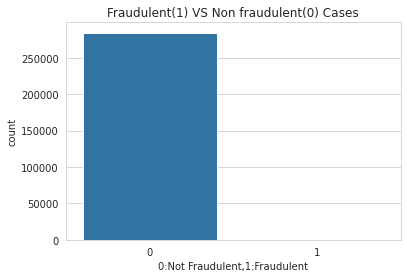

In [57]:
plt.title('Fraudulent(1) VS Non fraudulent(0) Cases')
sns.countplot(x=credit.Class)
plt.xlabel('0:Not Fraudulent,1:Fraudulent')

In [58]:
fraud = credit[credit['Class']==1]
not_fraud=credit[credit['Class']==0]

In [59]:
print('Fraudulent percentage {} and Non fraudulent percentage {}'.format(fraud.shape[0]/credit.shape[0]*100,not_fraud.shape[0]/credit.shape[0]*100))

Fraudulent percentage 0.1727485630620034 and Non fraudulent percentage 99.82725143693798


We can see this dataset is an imbalanced dataset.*italicised text*

In [60]:
fraud['Amount'].describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [61]:
not_fraud['Amount'].describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

As we see the mean amount transaction in fraud cases is higher as compared to non fraud case.

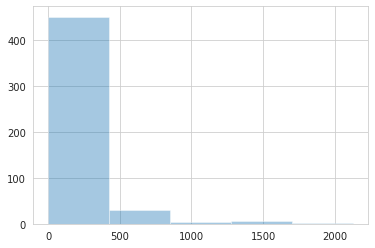

In [62]:
sns.distplot(credit, x=fraud.Amount,hist=True,kde=False,bins=5)

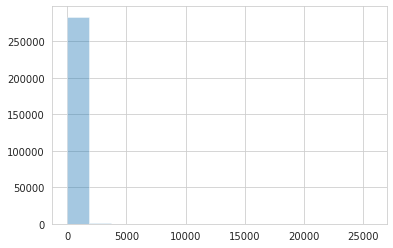

In [63]:
sns.distplot(credit, x=not_fraud.Amount,hist=True,kde=False,bins=14)

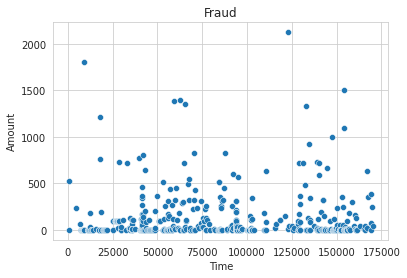

In [64]:
plt.title('Fraud')
sns.scatterplot(data=credit,x=fraud.Time,y=fraud.Amount)

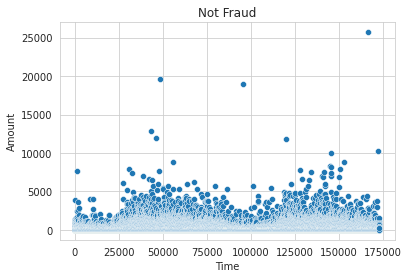

In [65]:
plt.title('Not Fraud')
sns.scatterplot(data=credit,x=not_fraud.Time,y=not_fraud.Amount)

In fraud cases there is frequent money transactions as compared to non-fraud cases.

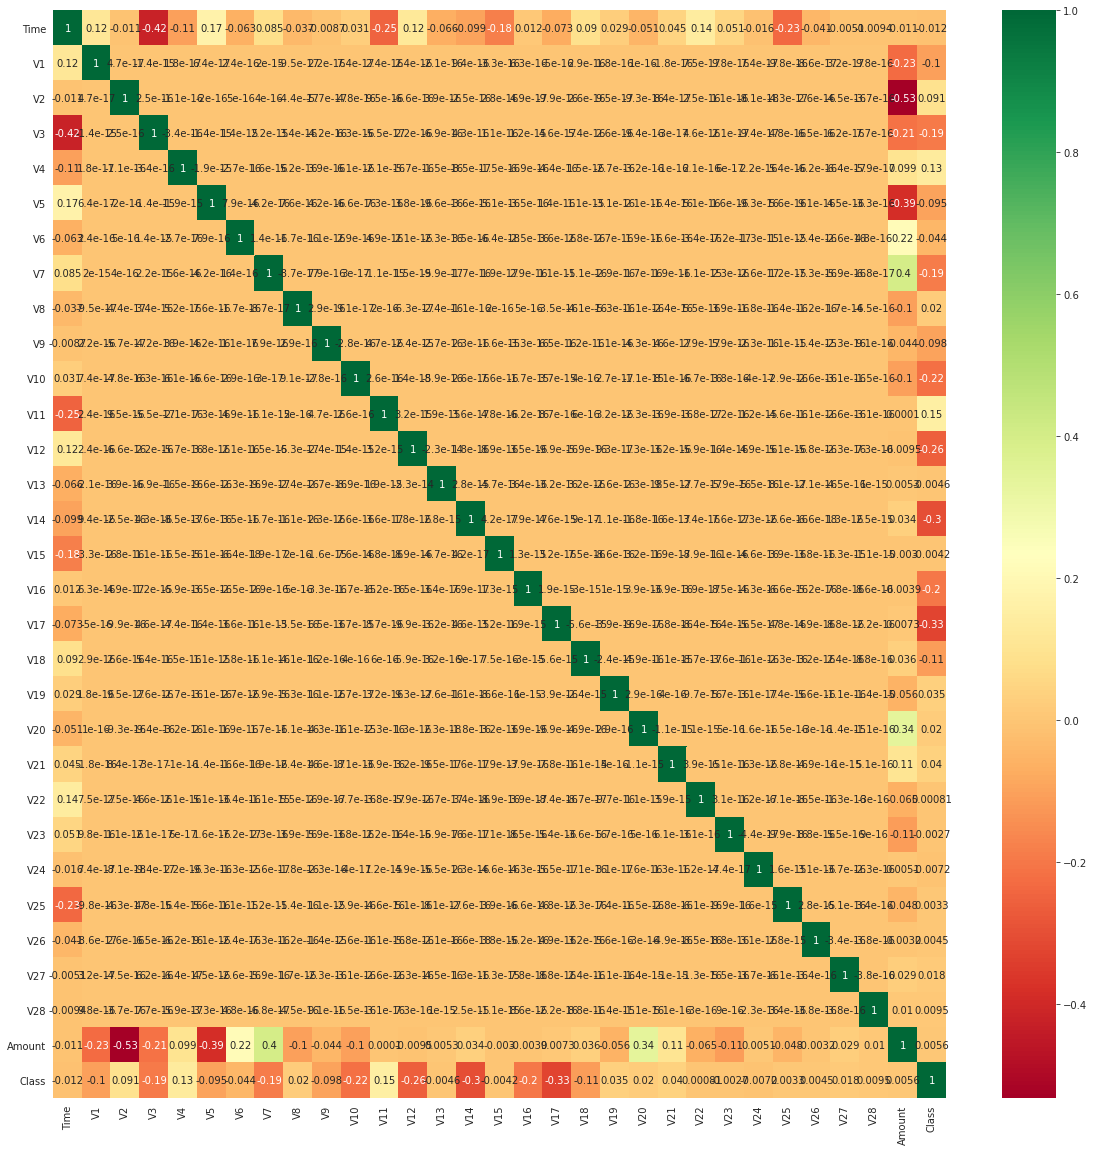

In [66]:
plt.figure(figsize=(20,20))
sns.heatmap(credit.corr(),annot=True,cmap="RdYlGn")

**Scaling Time and Amount features**

In [67]:
from sklearn.preprocessing import StandardScaler

In [68]:
sc=StandardScaler()

In [69]:
credit['time_scaled']=sc.fit_transform(credit['Time'].values.reshape(-1,1))
credit['amount_scaled']=sc.fit_transform(credit['Amount'].values.reshape(-1,1))

In [70]:
credit=credit.drop(['Time','Amount'],axis=1)

**Splitting the data**

In [71]:
X=credit.drop('Class',axis=1)
y=credit['Class']

In [72]:
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,time_scaled,amount_scaled
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,-1.996583,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-1.996583,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,-1.996562,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,-1.996562,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-1.996541,-0.073403


In [73]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

**Classification Algorithm**

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import KFold,cross_val_score

In [41]:
models=[]
models.append(('Logistic Regression',LogisticRegression(solver='lbfgs')))
models.append(('Random Forest',RandomForestClassifier(n_estimators=100)))
models.append(('SVM',SVC(gamma='auto')))

In [ ]:
names=[]
results=[]
for name,model in models:
  kfold=KFold(n_splits=10,random_state=1)
  cv_results=cross_val_score(model,X_train,y_train,cv=kfold,scoring='roc_auc')
  results.append(cv_results)
  names.append(name)
  print('%s %f %f'%(name ,cv_results.mean(),cv_results.std()))

Logistic Regression 0.975613 0.014322
Random Forest 0.946943 0.031545
SVM 0.934117 0.029035


**Applying SMOTE with oversampling**

In [77]:
from imblearn.over_sampling import SMOTE

In [78]:
sm=SMOTE(sampling_strategy='auto',kind='regular')
x_sampled,y_sampled=sm.fit_sample(X,y.values.ravel())


In [79]:
#Percentage of fraudulent in original dataset

original_fraud_count=len(credit[credit['Class']==1])
original_nofraud_count=len(credit[credit['Class']==0])

print('Percentage of fraud count is {}'.format(original_fraud_count/(original_fraud_count+original_nofraud_count)*100))
print('Percentage of not fraud count is {}'.format(original_nofraud_count/(original_fraud_count+original_nofraud_count)*100))


Percentage of fraud count is 0.1727485630620034
Percentage of not fraud count is 99.82725143693798


In [80]:
#Percentage of fraud in sampled dataset
sample_fraud_count=len(y_sampled[y_sampled==1])
sample_nofraud_count=len(y_sampled[y_sampled==0])

print('Percentage of fraud count is {}'.format(sample_fraud_count/(sample_fraud_count+sample_nofraud_count)*100))
print('Percentage of not fraud count is {}'.format(sample_nofraud_count/(sample_fraud_count+sample_nofraud_count)*100))

Percentage of fraud count is 50.0
Percentage of not fraud count is 50.0


**Splitting the sampled dataset**

In [81]:
x_train_sample,x_test_sample,y_train_sample,y_test_sample=train_test_split(x_sampled,y_sampled,test_size=0.3,random_state=1)

In [82]:
x_train_sample_df=pd.DataFrame(x_train_sample)
x_test_sample_df=pd.DataFrame(x_test_sample)
y_train_sample_df=pd.DataFrame(y_train_sample)
y_test_sample_df=pd.DataFrame(y_test_sample)

In [83]:
print("No. of train sample",len(x_train_sample))
print('No. of test sample',len(x_test_sample))

No. of train sample 398041
No. of test sample 170589


In [84]:
from sklearn.metrics import classification_report,confusion_matrix,precision_score,recall_score,f1_score

In [86]:
# This is to fit the sampled data without KFOLD 

def model(model,x_train_sample_df,y_train_sample_df,x_test_sample_df,y_test_sample_df):
  model.fit(x_train_sample_df,y_train_sample_df)
  ypred=model.predict(x_test_sample_df)
  
  

  #classification report
  
  print('Precision score is',precision_score(y_test_sample_df,ypred))
  print('Recall score is',recall_score(y_test_sample_df,ypred))
  print('F1 score is',f1_score(y_test_sample_df,ypred))

In [90]:
# This is to fit the data with KFOLD technique

def model_kfold(x_train_sample_df,y_train_sample_df,x_test_sample_df,y_test_sample_df):
  models=[]
  models.append(('Logistic Regression',LogisticRegression(solver='lbfgs')))
  models.append(('Random Forest',RandomForestClassifier(n_estimators=100)))
 
  names=[]
  results=[]
  for name,model in models:
    kfold=KFold(n_splits=10,random_state=1)
    cv_results=cross_val_score(model,x_train_sample,y_train_sample,cv=kfold,scoring='roc_auc')
    results.append(cv_results)
    names.append(name)
    print('%s %f %f'%(name ,cv_results.mean(),cv_results.std()))

**Model with KFOLD**

In [91]:
model_kfold(x_train_sample_df,y_train_sample_df,x_test_sample_df,y_test_sample_df)

Logistic Regression 0.989497 0.000507
Random Forest 0.999996 0.000008


**Model without KFOLD**

In [87]:
model(LogisticRegression(solver='lbfgs'),x_train_sample_df,y_train_sample_df,x_test_sample_df,y_test_sample_df)

Precision score is 0.9732639623604387
Recall score is 0.9181785089418866
F1 score is 0.9449190946332976
Classification report is               precision    recall  f1-score   support

           0       0.92      0.97      0.95     85428
           1       0.97      0.92      0.94     85161

    accuracy                           0.95    170589
   macro avg       0.95      0.95      0.95    170589
weighted avg       0.95      0.95      0.95    170589



In [88]:
model(RandomForestClassifier(n_estimators=100),x_train_sample_df,y_train_sample_df,x_test_sample_df,y_test_sample_df)

Precision score is 0.9997886803085267
Recall score is 1.0
F1 score is 0.9998943289890807
Classification report is               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85428
           1       1.00      1.00      1.00     85161

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589



From the above results, it is concluded that Random Forest algorithm shows the best results both using kfold and without using kfold.In the above result, the recall score for random forest is higher.In credit card fraud, we should focus on recall score more than precision.